In [1]:
!pip install plotly
!pip install kneed
!pip install sklearn_som
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=a243255adaf33808ff7ae29e43bfdacd3bf3c0f0f8b26921f85f198b7a9d71b9
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.feature_selection import RFE
import mlxtend
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import seaborn as sns
from warnings import simplefilter 
simplefilter(action='ignore')
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from kneed import KneeLocator
from sklearn_som.som import SOM
from minisom import MiniSom
from pylab import plot,axis,show,pcolor,colorbar,bone
from sklearn.utils.multiclass import unique_labels
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [3]:
pokemon_train = pd.read_csv("Pokemon_train.csv")
pokemon_test= pd.read_csv("Pokemon_test.csv")

In [4]:
x_pokemon_train=pokemon_train.iloc[:,:-1].to_numpy()
y_pokemon_train=pokemon_train.iloc[:,-1]

In [5]:
x_pokemon_test=pokemon_test.iloc[:,:-1].to_numpy()
y_pokemon_test=pokemon_test.iloc[:,-1]

Accuracy for Gaussian Naïve Bayes  in testing data:  51.43769968051119

Classification Report_Gaussian Naïve Bayes:

              precision    recall  f1-score   support

         bug       0.18      0.44      0.26        16
        dark       1.00      0.60      0.75        20
      dragon       0.56      0.94      0.70        16
    electric       0.23      0.44      0.30        16
       fairy       0.56      1.00      0.72         9
    fighting       0.83      0.86      0.84        22
        fire       0.35      0.67      0.46        18
       ghost       0.57      0.47      0.52        17
       grass       0.00      0.00      0.00        18
      ground       0.50      0.86      0.63        21
         ice       0.50      0.43      0.46        21
      normal       0.00      0.00      0.00        24
      poison       0.50      0.50      0.50        20
     psychic       0.71      0.22      0.33        23
        rock       0.83      0.67      0.74        15
       steel      

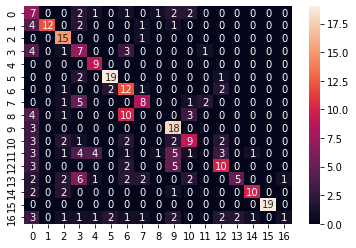

In [6]:
naive_clf = GaussianNB()
naive_clf.fit(x_pokemon_train,y_pokemon_train)
y_pred_naive=naive_clf.predict(x_pokemon_test)
#Making the Confusion Matrix and Classification Report
acc_GNB1=naive_clf.score(x_pokemon_test,y_pokemon_test)*100
print("Accuracy for Gaussian Naïve Bayes  in testing data: ",acc_GNB1)
print('\nClassification Report_Gaussian Naïve Bayes:\n')
print(classification_report(y_pokemon_test,y_pred_naive))
print('Confusion Matrix_Gaussian Naïve Bayes:\n')
hm=sn.heatmap(confusion_matrix(y_pokemon_test, y_pred_naive), annot=True)
plt.show()

Accuracy for model_SVM:  12.140575079872203

Classification Report_SVM:

              precision    recall  f1-score   support

         bug       0.00      0.00      0.00        16
        dark       0.00      0.00      0.00        20
      dragon       0.29      0.94      0.44        16
    electric       0.06      0.88      0.12        16
       fairy       0.22      1.00      0.36         9
    fighting       0.00      0.00      0.00        22
        fire       0.00      0.00      0.00        18
       ghost       0.00      0.00      0.00        17
       grass       0.00      0.00      0.00        18
      ground       0.00      0.00      0.00        21
         ice       0.00      0.00      0.00        21
      normal       0.00      0.00      0.00        24
      poison       0.00      0.00      0.00        20
     psychic       0.00      0.00      0.00        23
        rock       0.00      0.00      0.00        15
       steel       0.00      0.00      0.00        19
       w

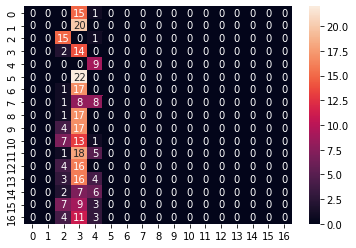

In [7]:
svm_clf= SVC(kernel='rbf',random_state=0)
svm_clf.fit(x_pokemon_train,y_pokemon_train)
# Predicting the Test set results
y_pred_svm=svm_clf.predict(x_pokemon_test)
#Making the Confusion Matrix and Classification Report
acc_SVC1=svm_clf.score(x_pokemon_test,y_pokemon_test)*100
print("Accuracy for model_SVM: ",acc_SVC1)
print('\nClassification Report_SVM:\n')
print(classification_report(y_pokemon_test,y_pred_svm))
print('Confusion MatrixSVM:\n')
# plot_confusion_matrix(svm_clf,x_pokemon_test,y_pokemon_test)
hm=sn.heatmap(confusion_matrix(y_pokemon_test,y_pred_svm), annot=True)
plt.show()

# TSNE on  train and test set to visualize

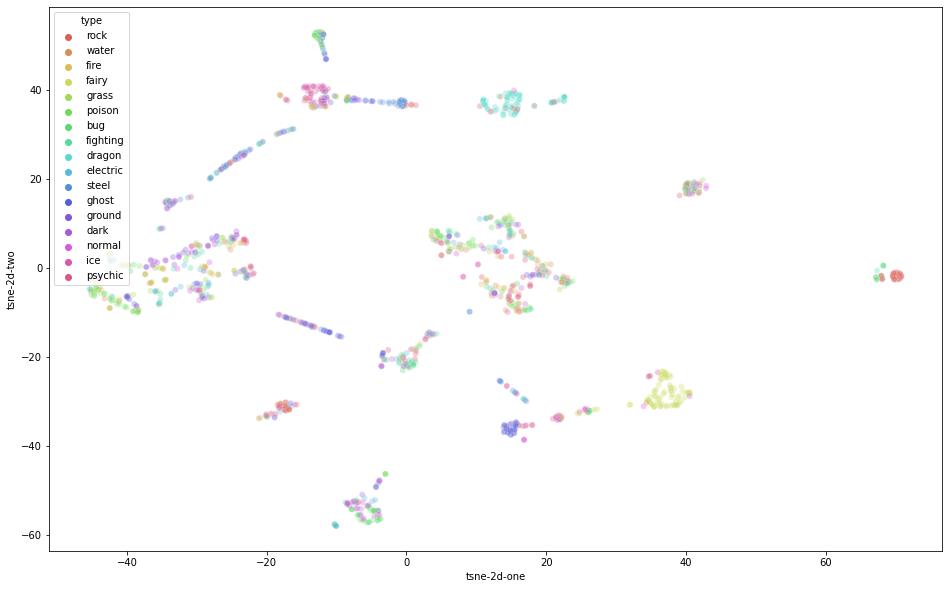

In [8]:
x_tsne_train=TSNE(n_components=2, random_state=0).fit_transform(x_pokemon_train)
x_tsne_train
pokemon_train_ts=pd.DataFrame()
pokemon_train_ts['tsne-2d-one'] = x_tsne_train[:,0]
pokemon_train_ts['tsne-2d-two'] = x_tsne_train[:,1]
pokemon_train_ts['type']=y_pokemon_train
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="type",
    palette=sns.color_palette("hls", 17),
    data=pokemon_train_ts,
    legend="full",
    alpha=0.3
)

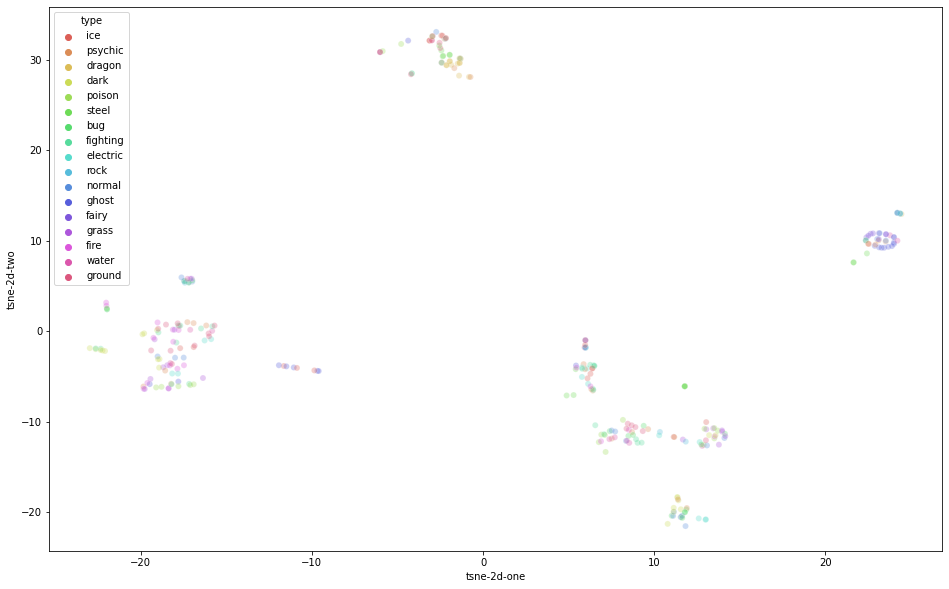

In [9]:
x_tsne_test=TSNE(n_components=2, random_state=0).fit_transform(x_pokemon_test)
pokemon_test_ts=pd.DataFrame()
pokemon_test_ts['tsne-2d-one'] = x_tsne_test[:,0]
pokemon_test_ts['tsne-2d-two'] = x_tsne_test[:,1]
pokemon_test_ts['type']=y_pokemon_test
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="type",
    palette=sns.color_palette("hls", 17),
    data=pokemon_test_ts,
    legend="full",
    alpha=0.3
)

# x,y after aplying TSNE

In [10]:
x_train_tsne=pokemon_train_ts.iloc[:,:-1].to_numpy()
y_train_tsne=pokemon_train_ts.iloc[:,-1]
x_test_tsne=pokemon_test_ts.iloc[:,:-1].to_numpy()
y_test_tsne=pokemon_test_ts.iloc[:,-1]

In [11]:
x_train_tsne.shape

(1251, 2)

Accuracy for Gaussian Naïve Bayes:  12.779552715654951

Classification Report_Gaussian Naïve Bayes:

              precision    recall  f1-score   support

         bug       0.00      0.00      0.00        16
        dark       0.00      0.00      0.00        20
      dragon       0.33      1.00      0.49        16
    electric       0.00      0.00      0.00        16
       fairy       0.00      0.00      0.00         9
    fighting       0.00      0.00      0.00        22
        fire       0.12      0.83      0.21        18
       ghost       0.00      0.00      0.00        17
       grass       0.00      0.00      0.00        18
      ground       0.00      0.00      0.00        21
         ice       0.00      0.00      0.00        21
      normal       0.00      0.00      0.00        24
      poison       0.00      0.00      0.00        20
     psychic       0.07      0.26      0.11        23
        rock       0.00      0.00      0.00        15
       steel       0.10      0.05 

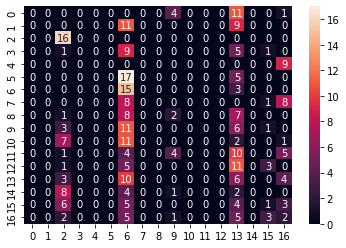

In [12]:
naive_clf_tsne = GaussianNB()
naive_clf_tsne.fit(x_train_tsne,y_train_tsne)
y_pred_naive_tsne=naive_clf_tsne.predict(x_test_tsne)
#Making the Confusion Matrix and Classification Report
print("Accuracy for Gaussian Naïve Bayes: ",naive_clf_tsne.score(x_test_tsne,y_test_tsne)*100)
print('\nClassification Report_Gaussian Naïve Bayes:\n')
print(classification_report(y_test_tsne,y_pred_naive_tsne))
print('Confusion Matrix_Gaussian Naïve Bayes:\n')
hm=sn.heatmap(confusion_matrix(y_test_tsne,y_pred_naive_tsne), annot=True)
plt.show()

Accuracy for model_SVM:  8.626198083067091

Classification Report_SVM:

              precision    recall  f1-score   support

         bug       0.00      0.00      0.00        16
        dark       0.00      0.00      0.00        20
      dragon       0.00      0.00      0.00        16
    electric       0.00      0.00      0.00        16
       fairy       0.00      0.00      0.00         9
    fighting       0.08      0.23      0.12        22
        fire       0.04      0.11      0.06        18
       ghost       0.00      0.00      0.00        17
       grass       0.00      0.00      0.00        18
      ground       0.11      0.52      0.18        21
         ice       0.00      0.00      0.00        21
      normal       0.00      0.00      0.00        24
      poison       0.00      0.00      0.00        20
     psychic       0.00      0.00      0.00        23
        rock       0.00      0.00      0.00        15
       steel       0.14      0.37      0.20        19
       wa

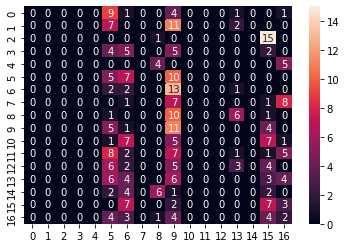

In [13]:
svm_clf_tsne= SVC(kernel='rbf',random_state=0)
svm_clf_tsne.fit(x_train_tsne,y_train_tsne)
# Predicting the Test set results
y_pred_svm_tsne=svm_clf_tsne.predict(x_test_tsne)
#Making the Confusion Matrix and Classification Report
print("Accuracy for model_SVM: ",svm_clf_tsne.score(x_test_tsne,y_test_tsne)*100)
print('\nClassification Report_SVM:\n')
print(classification_report(y_test_tsne,y_pred_svm_tsne))
print('Confusion MatrixSVM:\n')
hm=sn.heatmap(confusion_matrix(y_test_tsne,y_pred_svm_tsne), annot=True)
plt.show()

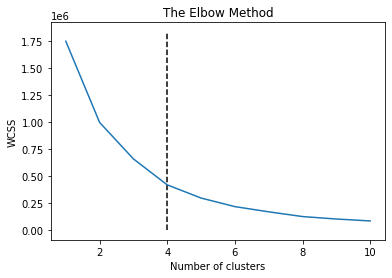

In [14]:
inertia1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x_train_tsne)
    inertia1.append(kmeans.inertia_)
kn1 = KneeLocator(range(1,11), inertia1, curve='convex', direction='decreasing')
plt.plot(range(1, 11), inertia1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.vlines(kn1.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 4 , init = 'k-means++', random_state = 42)
y_kmeans_prdict =kmeans.fit_predict(x_train_tsne) 

In [16]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(y_kmeans_prdict)

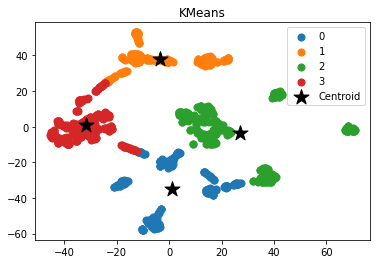

In [17]:
#plotting the results:
for i in u_labels:
    plt.scatter(x_train_tsne[y_kmeans_prdict == i , 0] , x_train_tsne[y_kmeans_prdict == i , 1] , label = i, s=50)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 250, marker='*', color = 'k',label = 'Centroid')
plt.title("KMeans")
plt.legend()
plt.show()

In [18]:
# Models
SVC_model=SVC(kernel='rbf',random_state=0)
GNB_model=GaussianNB()

## LDA

In [19]:
def apply_LDA(model,baseModel_acc):
    model_scores=[]
    for i in range(2,33):
      LDA = LinearDiscriminantAnalysis(n_components=i)
      x_train_lda = LDA.fit_transform(x_pokemon_train,y_pokemon_train)
      x_test_lda = LDA.transform(x_pokemon_test)
      model.fit(x_train_lda,y_pokemon_train)
      yPred_lda = model.predict(x_test_lda)
      acc_lda = accuracy_score(y_pokemon_test, yPred_lda)*100
      model_scores.append(acc_lda)
    max_accuracy=max(model_scores)
    index_best_com = model_scores.index(max_accuracy)+2
    # Plot a simple line chart
    plt.plot(range(2,33), model_scores, 'b', label='LDA')
    # Plot another line on the same chart/graph
    plt.axhline( y=baseModel_acc,c='r', label='baseline')
    plt.xlabel("Number of Features", fontsize=16)
    plt.ylabel("Accuracy (%)", fontsize=16) 
    plt.legend()
    plt.show()
    return index_best_com,max_accuracy


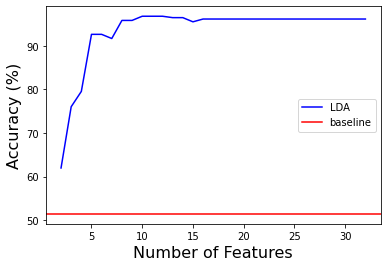

Maximum accuracy: 96.8% 
Best number of features: 10


In [20]:
component_num_GNB_lda,acc_GNB_lda = apply_LDA(GNB_model,acc_GNB1)
print(f"Maximum accuracy: {acc_GNB_lda:.1f}% \nBest number of features: {component_num_GNB_lda}")

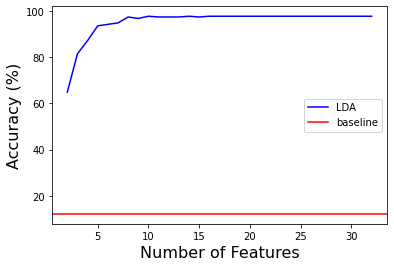

Maximum accuracy: 97.8% 
Best number of features: 10


In [21]:
component_num_SVM_lda,acc_SVM_lda = apply_LDA(SVC_model,acc_SVC1)
print(f"Maximum accuracy: {acc_SVM_lda:.1f}% \nBest number of features: {component_num_SVM_lda}")

# Q5

In [22]:
# Data after transformation with 10 features
LDA = LinearDiscriminantAnalysis(n_components=10)
x_train_lda = LDA.fit_transform(x_pokemon_train,y_pokemon_train)
x_test_lda = LDA.transform(x_pokemon_test)

In [23]:
def select_feature(fs, model):
    fs.fit(x_train_lda, y_pokemon_train)
    train_new = fs.transform(x_train_lda)
    test_new = fs.transform(x_test_lda) 
    model.fit(train_new, y_pokemon_train)
    yPred = model.predict(test_new)
    acc = accuracy_score(y_pokemon_test, yPred) * 100
    return acc

## filter

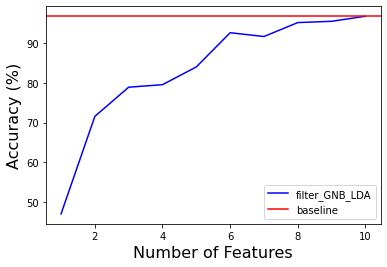

Maximum accuracy: 96.8% 
Best number of features: 10


In [24]:
model_scores_nb_lda = []
for i in range(1,11):
    fsm =  SelectKBest(mutual_info_classif, k=i)
    model_scores_nb_lda.append(select_feature(fsm, GNB_model))
max_accuracy=max(model_scores_nb_lda)
index_best_com = model_scores_nb_lda.index(max_accuracy)+1
# Plot a simple line chart
plt.plot(range(1,11), model_scores_nb_lda, 'b', label='filter_GNB_LDA')
# Plot another line on the same chart/graph
plt.axhline( y=acc_GNB_lda,c='r', label='baseline')
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16) 
plt.legend()
plt.show()
print(f"Maximum accuracy: {max_accuracy:.1f}% \nBest number of features: {index_best_com}")

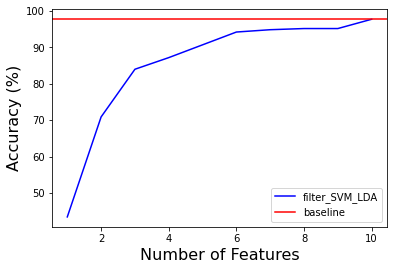

Maximum accuracy: 97.8% 
Best number of features: 10


In [25]:
model_scores_svm_lda = []
for i in range(1,11):
    fsm =  SelectKBest(mutual_info_classif, k=i)
    model_scores_svm_lda.append(select_feature(fsm, SVC_model))
max_accuracy=max(model_scores_svm_lda)
index_best_com = model_scores_svm_lda.index(max_accuracy)+1
# Plot a simple line chart
plt.plot(range(1,11), model_scores_svm_lda, 'b', label='filter_SVM_LDA')
# Plot another line on the same chart/graph
plt.axhline( y=acc_SVM_lda,c='r', label='baseline')
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16) 
plt.legend()
plt.show()
print(f"Maximum accuracy: {max_accuracy:.1f}% \nBest number of features: {index_best_com}")

## wrapper

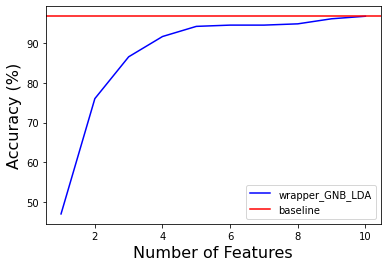

Maximum accuracy: 96.8% 
Best number of features: 10


In [26]:
model_scores_nb_lda2 = []
for i in range(1,11):
    sfs = SFS(GNB_model,k_features=i,forward=True)
    model_scores_nb_lda2.append(select_feature(sfs, GNB_model))
max_accuracy=max(model_scores_nb_lda2)
index_best_com = model_scores_nb_lda2.index(max_accuracy)+1
# Plot a simple line chart
plt.plot(range(1,11), model_scores_nb_lda2, 'b', label='wrapper_GNB_LDA')
# Plot another line on the same chart/graph
plt.axhline( y=acc_GNB_lda,c='r', label='baseline')
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16) 
plt.legend()
plt.show()
print(f"Maximum accuracy: {max_accuracy:.1f}% \nBest number of features: {index_best_com}")

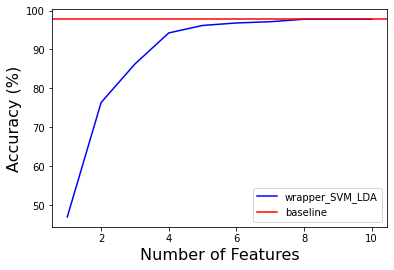

Maximum accuracy: 97.8% 
Best number of features: 8


In [27]:
model_scores_svm_lda2 = []
for i in range(1,11):
    sfs = SFS(SVC_model,k_features=i,forward=True)
    model_scores_svm_lda2.append(select_feature(sfs, SVC_model))
max_accuracy=max(model_scores_svm_lda2)
index_best_com = model_scores_svm_lda2.index(max_accuracy)+1
# Plot a simple line chart
plt.plot(range(1,11), model_scores_svm_lda2, 'b', label='wrapper_SVM_LDA')
# Plot another line on the same chart/graph
plt.axhline( y=acc_SVM_lda,c='r', label='baseline')
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16) 
plt.legend()
plt.show()
print(f"Maximum accuracy: {max_accuracy:.1f}% \nBest number of features: {index_best_com}")

# Q6

In [28]:
sfs = SFS(SVC_model,k_features=8,forward=True)
sfs.fit(x_train_lda, y_pokemon_train)
train_sfs_SVM = sfs.transform(x_train_lda)
test_sfs_SVM = sfs.transform(x_test_lda) 

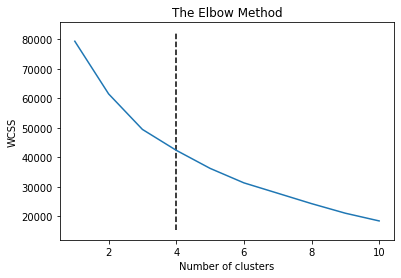

In [29]:
inertia2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(train_sfs_SVM)
    inertia2.append(kmeans.inertia_)

kn2 = KneeLocator(range(1,11), inertia2, curve='convex', direction='decreasing')
plt.plot(range(1, 11), inertia2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.vlines(kn2.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 4 , init = 'k-means++', random_state = 42)
y_kmeans_prdict =kmeans.fit_predict(train_sfs_SVM) 

In [31]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(y_kmeans_prdict) 

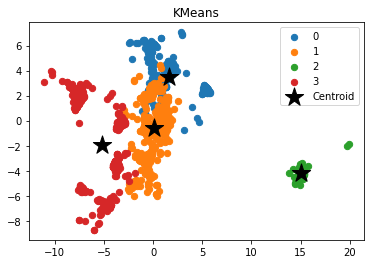

In [32]:
#plotting the results:
for i in u_labels:
    plt.scatter(train_sfs_SVM[y_kmeans_prdict == i , 0] , train_sfs_SVM[y_kmeans_prdict == i , 1] , label = i, s=40)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 370, marker='*', color = 'k',label = 'Centroid')
plt.title("KMeans")
plt.legend()
plt.show()

# Q7

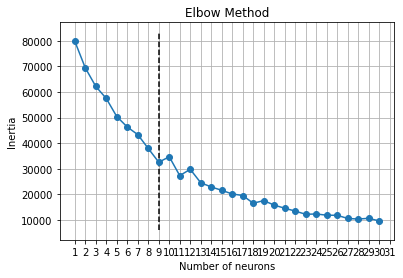

In [33]:
score = []
df_som = pd.DataFrame(test_sfs_SVM)
for i in range(1,31):
  SOM_model = SOM(m=i, n=1, dim=train_sfs_SVM.shape[1],max_iter=3000,random_state=7)
  SOM_model.fit(train_sfs_SVM)
  SOM_lables=SOM_model.predict(test_sfs_SVM)
  score.append((SOM_model.inertia_,i))
df_som['SOM_lables'] = SOM_lables
df_score = pd.DataFrame(score, columns=['score','neurons'])
kn3 = KneeLocator(range(1,31), df_score['score'], curve='convex', direction='decreasing')
plt.plot(df_score['neurons'], df_score['score'], marker = 'o')
plt.title("Elbow Method")
plt.xlabel("Number of neurons")
plt.ylabel("Inertia")
plt.xticks([i for i in range(1,33)])
plt.grid(True)
plt.vlines(kn3.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

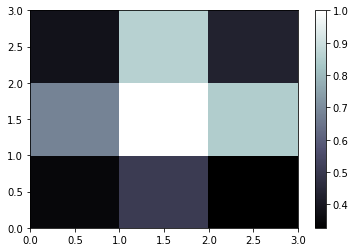

In [34]:
np.random.seed(43)
som_rows=3
som_columns=3
som_iterations=3000
sigma=1
learning_rate=0.5
np.random.seed(42)
som_init = MiniSom(x = som_rows, y = som_columns, input_len=8, sigma=sigma, learning_rate=learning_rate)
som_init.random_weights_init(train_sfs_SVM)
bone()
pcolor(som_init.distance_map().T) 
colorbar()
show()

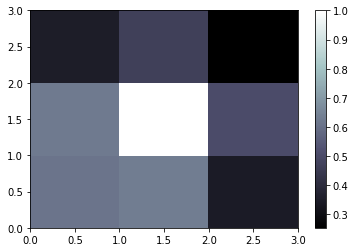

In [35]:
np.random.seed(42)
som_final=MiniSom(x = som_rows, y = som_columns, input_len=8, sigma=sigma, learning_rate=learning_rate)
som_final.train_random(train_sfs_SVM,som_iterations)
som_final.distance_map()
bone()
pcolor(som_final.distance_map().T)
colorbar()
show()

# Q8

In [36]:
def unsupervisedLabelMap(labels, y):
    labelDict = dict()
    for label in unique_labels(labels):
        tmpY = y[labels == label]
        unique, count = np.unique(tmpY, return_counts=True)
        trueLabel = unique[np.argmax(count)]
        labelDict[label] = trueLabel
    return labelDict
def usLabels2sLabels(labels, y):
    sLabels = np.empty(labels.shape, labels.dtype)
    labelDict = unsupervisedLabelMap(labels, y)
    for usl, tl in labelDict.items():
        sLabels[labels == usl] = tl
    return sLabels
encoder = LabelEncoder()
encoder_train_y = encoder.fit_transform(y_pokemon_train)

100%|██████████| 14/14 [00:01<00:00,  7.56it/s]


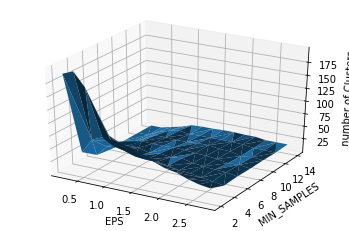

1.6 2 0.9536370903277378 55 64


In [41]:
epsList, mpList, clustersList, accuracyList,noiselist = list(), list(), list(), list(),list()
for eps in tqdm(np.arange(0.2, 3,0.2)):
        for mp in range(2, 15,2):
            model = DBSCAN(eps=eps, min_samples=mp)
            y_pred_db = model.fit_predict(train_sfs_SVM)
            labels = model.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)
            predY = usLabels2sLabels(y_pred_db, encoder_train_y)
            accuracy = accuracy_score(encoder_train_y, predY)
            epsList.append(eps)
            mpList.append(mp)
            clustersList.append(n_clusters_)
            accuracyList.append(accuracy)
            noiselist.append(n_noise_)
epsList, mpList, accuracyList, clustersList,noiselist = np.array(epsList), np.array(mpList),np.array(accuracyList), np.array(clustersList),np.array(noiselist)
ax = plt.axes(projection='3d')
ax.plot_trisurf(epsList, mpList, clustersList)
ax.set_xlabel('EPS')
ax.set_ylabel('MIN_SAMPLES')
ax.set_zlabel('number of Clusters')
plt.show()
x = accuracyList.argmax()
print(epsList[x], mpList[x], accuracyList[x],noiselist[x],clustersList[x])

In [42]:
df = pd.DataFrame()
df['epsilon'] = epsList
df['minpoint'] =mpList
df['noise'] = noiselist
df['accuracy'] =accuracyList
df['number of cluster'] =clustersList
df2 = df.sort_values(by = ['number of cluster'])
df2

,epsilon,minpoint,noise,accuracy,number of cluster
4,0.2,10,1234,0.075140,1
5,0.2,12,1236,0.073541,1
6,0.2,14,1236,0.073541,1
12,0.4,12,1213,0.091926,1
13,0.4,14,1213,0.091926,1
...,...,...,...,...,...
28,1.0,2,139,0.901679,91
21,0.8,2,191,0.872102,131
14,0.6,2,280,0.811351,173
0,0.2,2,745,0.463629,191


In [43]:
df2['number of cluster'].unique()

array([  1,   2,   3,   4,   6,  11,  12,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  31,  32,  33,
        35,  36,  37,  38,  45,  49,  50,  54,  57,  63,  64,  75,  80,
        91, 131, 173, 191, 199])

In [44]:
df2['noise'].unique()

array([1234, 1236, 1213, 1221, 1212, 1181, 1074,  967,  881, 1089,  909,
        122,  144,  133,  146,  164,   48,   86,  100,  135,  174,  874,
         65,  119,  779,  115,  633,  437,  214,  191,  253,  459,  102,
        371,  311,   50,  216,  353,  280,  269,  312,   76,  169,  142,
        552,  187,   85,  299,  373,   58,  668,  162,  109,  979,  507,
        202, 1115,  230,  123,  207,   82,  445,  322,  604,   17,  247,
         96,  277,   18,  149,  112,  338,  487,  130,   22,  709,  209,
        252,   33,   38,  396,  810,  547,   55,   67,  103,  139,  745,
        467])

In [45]:
df3=df2.drop_duplicates(subset=['number of cluster'],keep='last')
df3

,epsilon,minpoint,noise,accuracy,number of cluster
13,0.4,14,1213,0.091926,1
3,0.2,8,1221,0.085532,2
2,0.2,6,1212,0.092726,3
11,0.4,10,1181,0.117506,4
20,0.6,14,1074,0.203038,6
27,0.8,14,881,0.357314,11
10,0.4,8,1089,0.191047,12
18,0.6,10,909,0.334932,14
96,2.8,12,122,0.822542,15
83,2.4,14,174,0.847322,16


In [46]:
df4=df3.head(10)
df4

,epsilon,minpoint,noise,accuracy,number of cluster
13,0.4,14,1213,0.091926,1
3,0.2,8,1221,0.085532,2
2,0.2,6,1212,0.092726,3
11,0.4,10,1181,0.117506,4
20,0.6,14,1074,0.203038,6
27,0.8,14,881,0.357314,11
10,0.4,8,1089,0.191047,12
18,0.6,10,909,0.334932,14
96,2.8,12,122,0.822542,15
83,2.4,14,174,0.847322,16


In [47]:
df4[['epsilon', 'minpoint','number of cluster']]

,epsilon,minpoint,number of cluster
13,0.4,14,1
3,0.2,8,2
2,0.2,6,3
11,0.4,10,4
20,0.6,14,6
27,0.8,14,11
10,0.4,8,12
18,0.6,10,14
96,2.8,12,15
83,2.4,14,16


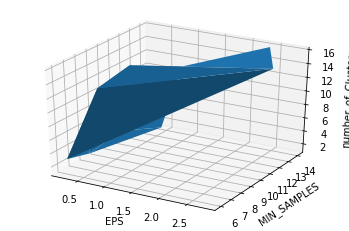

In [48]:
eps_List, mi_List, accuracy_List, clusters_List, noise_list = np.array(df4['epsilon']), np.array(df4['minpoint']),np.array(df4['accuracy']), np.array(df4['number of cluster']),np.array(df4['noise'])
ax = plt.axes(projection='3d')
ax.plot_trisurf(eps_List, mi_List, clusters_List)
ax.set_xlabel('EPS')
ax.set_ylabel('MIN_SAMPLES')
ax.set_zlabel('number_of_Clusters')
plt.show()